## Observations and Insights

## Dependencies and starter code

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
import matplotlib.pyplot as plt
# Combine the data into a single dataset

In [147]:
print(mouse_metadata)
print(study_results)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [148]:
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [149]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

RegimenGrp = merge_df.groupby("Drug Regimen")
RegimenGrp.count()


dataPoints = RegimenGrp["Tumor Volume (mm3)"].count()
TumorMean = RegimenGrp["Tumor Volume (mm3)"].mean()
TumorMedian = RegimenGrp["Tumor Volume (mm3)"].median()
TumorVariance = RegimenGrp["Tumor Volume (mm3)"].var()
TumorStandDev = RegimenGrp["Tumor Volume (mm3)"].std()
TumorSEM = RegimenGrp["Tumor Volume (mm3)"].sem()

Tumor_df = pd.DataFrame({
    "counts":dataPoints,
    "Tumor mean":TumorMean,
    "Tumor median":TumorMedian,
    "Tumor variance":TumorVariance,
    "Tumor std dev":TumorStandDev,
    "Tumor sem":TumorSEM
})
Tumor_df

,counts,Tumor mean,Tumor median,Tumor variance,Tumor std dev,Tumor sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

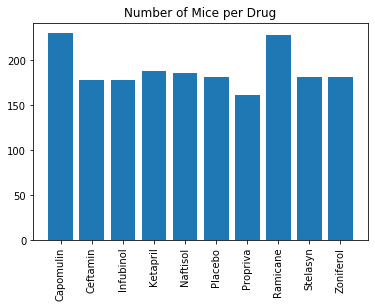

In [150]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

x_axis = np.arange(len(dataPoints))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, Tumor_df["counts"])
plt.xticks(tick_locations, dataPoints.index.values, rotation="vertical")

plt.title("Number of Mice per Drug")
plt.show()


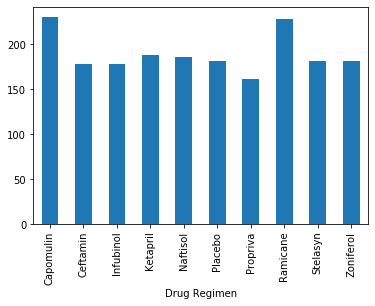

In [151]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


dataPoints.plot(kind="bar")
plt.show()

## Pie plots

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
GenderGrp = pd.DataFrame(merge_df.groupby(["Sex"]).count()).reset_index()
GenderGrp



,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


      Sex  Mouse ID
0  Female       935
1    Male       958


<Figure size 432x288 with 0 Axes>

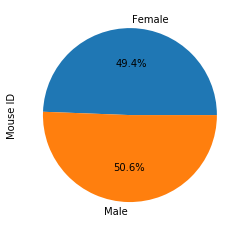

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
GenderGrp_small = GenderGrp[["Sex","Mouse ID"]]
print(GenderGrp_small)

plt.figure()
GenderGrp_small.plot(kind="pie", y="Mouse ID", labels=GenderGrp["Sex"], autopct="%1.1f%%", legend=False)

## Quartiles, outliers and boxplots

In [154]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.

Tumor_df = Tumor_df.sort_values(["Tumor mean"], ascending=True)
print(Tumor_df)





              counts  Tumor mean  Tumor median  Tumor variance  Tumor std dev  \
Drug Regimen                                                                    
Ramicane         228   40.216745     40.673236       23.486704       4.846308   
Capomulin        230   40.675741     41.557809       24.947764       4.994774   
Propriva         161   52.322552     50.854632       42.351070       6.507770   
Ceftamin         178   52.591172     51.776157       39.290177       6.268188   
Infubinol        178   52.884795     51.820584       43.128684       6.567243   
Zoniferol        182   53.236507     51.818479       48.533355       6.966589   
Placebo          181   54.033581     52.288934       61.168083       7.821003   
Stelasyn         181   54.233149     52.431737       59.450562       7.710419   
Naftisol         186   54.331565     52.509285       66.173479       8.134708   
Ketapril         188   55.235638     53.698743       68.553577       8.279709   

              Tumor sem  
D

In [155]:
#keep only rows with timepoing=45
LastMeasure_df = merge_df.loc[merge_df["Timepoint"]==45]
LastMeasure_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1


In [156]:
#list of four best drugs
BestTxtList = ["Ramicane","Capomulin","Propriva","Ceftamin"]

BestTxt_df = LastMeasure_df[LastMeasure_df["Drug Regimen"].isin(BestTxtList)]

BestTxt_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


Results for Ramicane:
The lower quartile Tumor Volume is: 30.981175224999998
The upper quartile Tumor Volume is: 38.508305307499995
The interquartile Tumor Volume range is: 7.527130082499998
The the median Tumor Volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


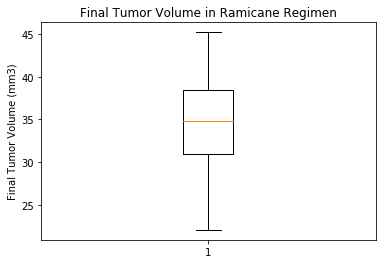


Results for Capomulin:
The lower quartile Tumor Volume is: 32.37735684
The upper quartile Tumor Volume is: 40.1592203
The interquartile Tumor Volume range is: 7.781863460000004
The the median Tumor Volume is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


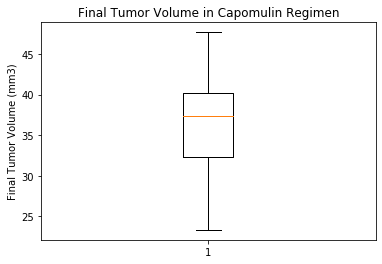


Results for Propriva:
The lower quartile Tumor Volume is: 63.55138852499999
The upper quartile Tumor Volume is: 70.33026831000001
The interquartile Tumor Volume range is: 6.778879785000015
The the median Tumor Volume is: 64.95756185 
Values below 53.38306884749997 could be outliers.
Values above 80.49858798750003 could be outliers.


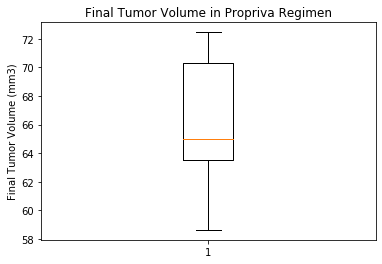


Results for Ceftamin:
The lower quartile Tumor Volume is: 61.43389223
The upper quartile Tumor Volume is: 67.52748237
The interquartile Tumor Volume range is: 6.093590140000003
The the median Tumor Volume is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


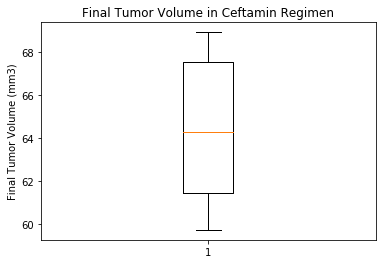

In [157]:


for drugName in BestTxtList:

    Txt_df = BestTxt_df.loc[BestTxt_df["Drug Regimen"]==drugName].reset_index()

    Txt_df=Txt_df[["Tumor Volume (mm3)"]]
    
    TxtVolume = Txt_df["Tumor Volume (mm3)"]

    quartiles = TxtVolume.quantile([.25,.5,.75])
    quartiles

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"Results for {drugName}:")
    print(f"The lower quartile Tumor Volume is: {lowerq}")
    print(f"The upper quartile Tumor Volume is: {upperq}")
    print(f"The interquartile Tumor Volume range is: {iqr}")
    print(f"The the median Tumor Volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    
    # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Final Tumor Volume in {drugName} Regimen')
    ax1.set_ylabel('Final Tumor Volume (mm3)')
    ax1.boxplot(TxtVolume)
    plt.show()
    
    
    print()


## Line and scatter plots

In [158]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin"]
Capomulin_df = Capomulin_df.reset_index()
Capomulin_df.head()

Mickey_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "m601"]
Mickey_df = Mickey_df[["Timepoint","Tumor Volume (mm3)"]]
Mickey_df.set_index('Timepoint')

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,41.408591
10,36.825367
15,35.464612
20,34.255732
25,33.118756
30,31.758275
35,30.834357
40,31.378045


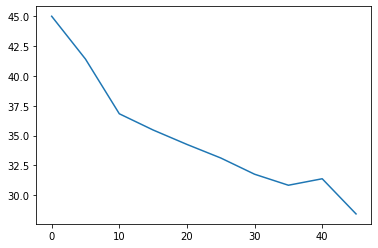

In [159]:
MickeysTumorSize = Mickey_df[["Tumor Volume (mm3)"]]
Timepoints = Mickey_df[["Timepoint"]]

plt.plot(Timepoints, MickeysTumorSize, label="Tumor size")
plt.show()

In [160]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_df2 = Capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
Capomulin_df2.head()

#calculate avg tumor volume
averageTumor = pd.DataFrame(Capomulin_df2.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
averageTumor = averageTumor.rename(columns={"Tumor Volume (mm3)": "Average Tumor"})
averageTumor = averageTumor.set_index('Mouse ID')
averageTumor

,Weight (g),Average Tumor
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


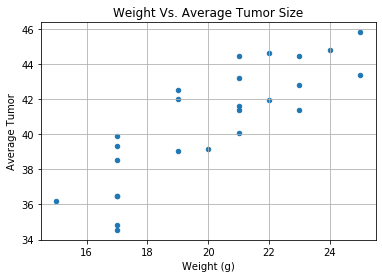

In [161]:
averageTumor.plot(kind="scatter", x="Weight (g)", y="Average Tumor", grid=True,
              title="Weight Vs. Average Tumor Size")
plt.show()

In [162]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#correlation
weight = averageTumor["Weight (g)"]
avgTumor = averageTumor["Average Tumor"]
correlation = st.pearsonr(weight,avgTumor)
print(f"Correlation between weight and tumor size is {round(correlation[0],2)}")

Correlation between weight and tumor size is 0.84


The r-squared is: 0.8419363424694718


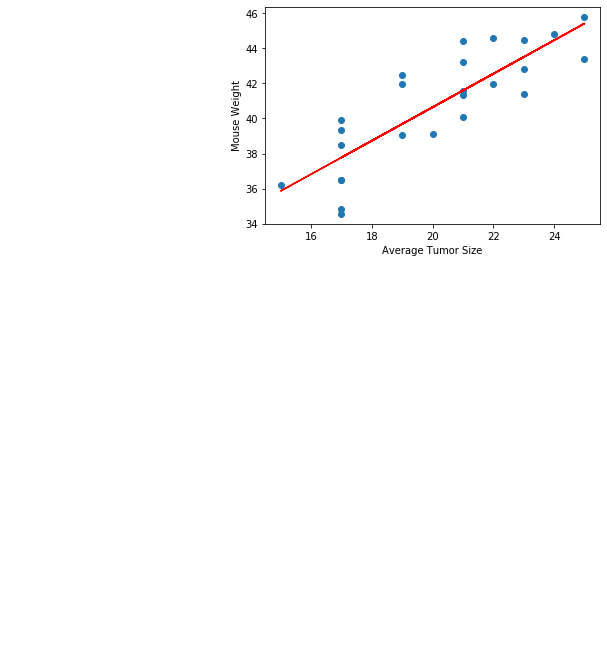

In [169]:
#regression

x_values = weight
y_values = avgTumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Tumor Size')
plt.ylabel('Mouse Weight')
print(f"The r-squared is: {rvalue}")
plt.show()

